# World Happiness Report Project

### Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.
#### Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
https://github.com/dsrscientist/DSData


# Step 1: Importing the necessary libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [34]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

# Step 2: Loading the dataset and pre-processing

In [54]:
data = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Internship\\Practice Projects\\Phase - 2\\Happiness_score_dataset.csv")

In [47]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [38]:
# Checking rows and columns count

data.shape

(158, 12)

In [39]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [55]:
data_columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)','Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']

In [56]:
data = data[data_columns].copy()

In [60]:
# Reaming a few columns

happy_df = data.rename(columns = {'Economy (GDP per Capita)' : 'Economy',
                           'Health (Life Expectancy)': 'Health','Trust (Government Corruption)':'Corruption'})
                            


In [61]:
happy_df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Corruption,Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [62]:
happy_df.isna().sum()

Country            0
Region             0
Happiness Rank     0
Happiness Score    0
Economy            0
Family             0
Health             0
Freedom            0
Corruption         0
Generosity         0
dtype: int64

In [63]:
## Getting some info about the dataset

happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          158 non-null    object 
 1   Region           158 non-null    object 
 2   Happiness Rank   158 non-null    int64  
 3   Happiness Score  158 non-null    float64
 4   Economy          158 non-null    float64
 5   Family           158 non-null    float64
 6   Health           158 non-null    float64
 7   Freedom          158 non-null    float64
 8   Corruption       158 non-null    float64
 9   Generosity       158 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.5+ KB


- There are no missing values in the data

# Step 3: Data Analysis

In [64]:
# Checking statistics of data

happy_df.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Corruption,Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


### Data Visualisation

<AxesSubplot:>

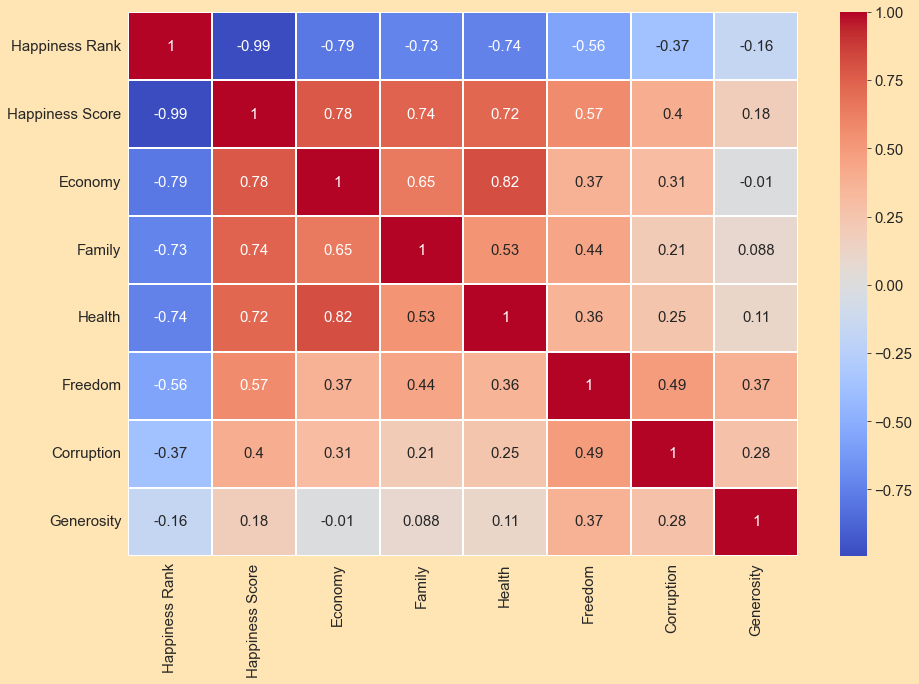

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(happy_df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

- There is an inverse correlation between “overall Rank” and all the other numerical variables. The lower the happiness(overall) rank, the higher the score, and the higher the other six factors that contribute to happiness.

- According to the above correlation plot, Economy, Family and health play the most significant role in contributing to happiness. 
- Generosity and Corruption have the lowest impact on the happiness score.

In [ ]:
### Let’s see relationship between different features with happiness score.

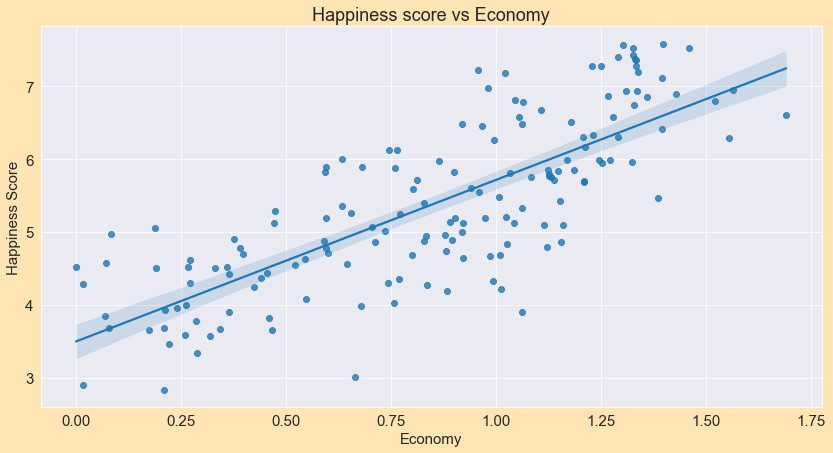

In [66]:
plt.figure(figsize=(14,7))

plt.title("Happiness score vs Economy")
sns.regplot(data = happy_df, x='Economy', y='Happiness Score');

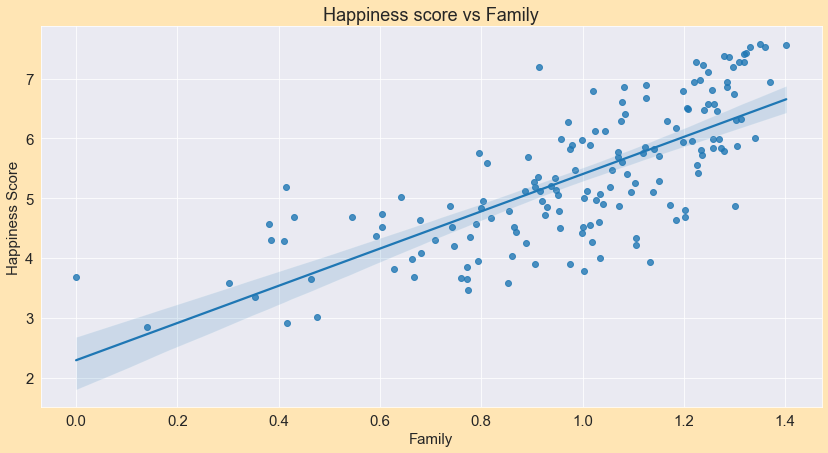

In [67]:
plt.figure(figsize=(14,7))

plt.title("Happiness score vs Family")
sns.regplot(data=happy_df, x='Family', y='Happiness Score');

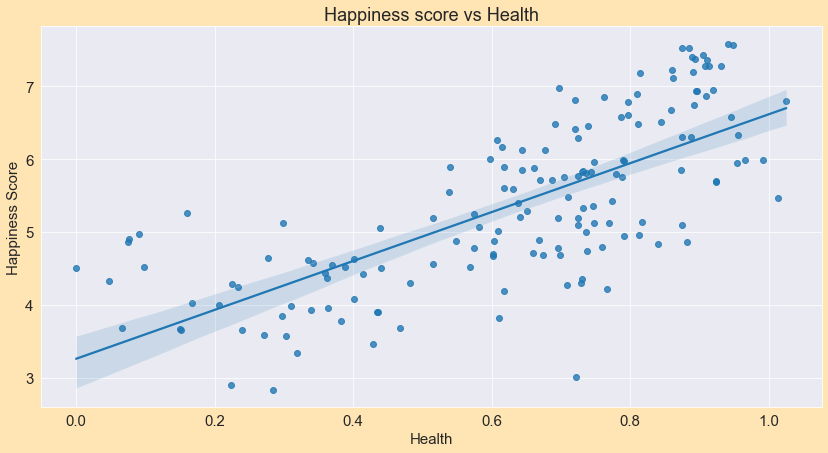

In [69]:
plt.figure(figsize=(14,7))

plt.title("Happiness score vs Health")
sns.regplot(data=happy_df, x='Health', y='Happiness Score');

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Economy'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health'}>,
        <AxesSubplot:title={'center':'Freedom'}>],
       [<AxesSubplot:title={'center':'Corruption'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Dystopia Residual'}>]], dtype=object)

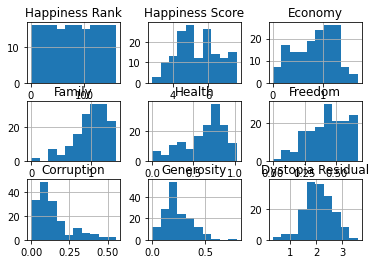

In [20]:
data_new.hist()

C:\Users\suven\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,2.51738


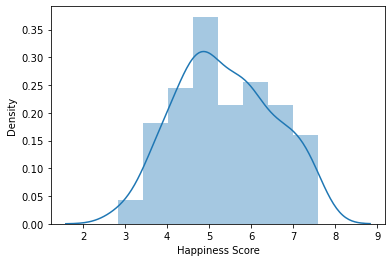

In [30]:
## How is 'Happiness Score' distributed?

sns.distplot(data_new['Happiness Score'])
data_new.head(1)

As we can see above happiness score has values above 2.839 and below 7.587. So there is no single country which has happiness score above 8.

# Step 4: Train Test Data Split

In [108]:
y = happy_df['Happiness Score']
X = happy_df.drop(['Happiness Rank','Happiness Score','Country','Region'], axis = 1)

In [110]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [109]:
X

,Economy,Family,Health,Freedom,Corruption,Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [111]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


In [112]:
X

,Economy,Family,Health,Freedom,Corruption,Generosity
0,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895
1,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198
2,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947
3,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983
4,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602
...,...,...,...,...,...,...
153,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314
154,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432
155,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790
156,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [114]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(158, 6)
(110, 6)
(48, 6)


# Step 5: Model Training

### LinearRegression

In [115]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### Predictions from our model

In [119]:
# Predicting the target variable for train datset
X_train_pred = model.predict(X_train)

In [120]:
# R squared value

from sklearn import metrics
r2_train = metrics.r2_score(y_train, X_train_pred)
print('R squared value: ', r2_train)

R squared value:  0.7663792134376416


In [122]:
# Predicting the target variable for test datset
X_test_pred = model.predict(X_test)

In [123]:
# R squared value

r2_test = metrics.r2_score(y_test, X_test_pred)
print('R squared value: ', r2_train)

R squared value:  0.7663792134376416
